# 1. Carregamento e Limpeza dos Dados
Nesta seção, vamos carregar o dataset, inspecionar sua estrutura e realizar os primeiros passos de limpeza e tratamento de dados.



```
1.1. Importação de Bibliotecas
```



In [1]:
# Importação das bibliotecas essenciais para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de visualização para o notebook
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")



```
1.2. Carregamento do Dataset
```



In [2]:
# Carregar o dataset do Kaggle
try:
    df = pd.read_csv('ai_job_dataset.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'ai_job_dataset.csv' não foi encontrado. Verifique o caminho.")
    # Crie um DataFrame vazio para não quebrar o código
    df = pd.DataFrame()

# Exibir as 5 primeiras linhas para inspecionar
if not df.empty:
    print("\nPrimeiras linhas do dataset:")
    display(df.head())

    # Exibir informações gerais sobre o dataset
    print("\nInformações gerais do dataset:")
    df.info()

Dataset carregado com sucesso!

Primeiras linhas do dataset:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  postin



```
1.3. Análise Inicial e Tratamento de Dados Ausentes (Missing Values)
```



In [3]:
if not df.empty:
    # Contagem de valores nulos por coluna
    print("\nContagem de valores nulos:")
    nulos = df.isnull().sum()
    nulos_percent = (nulos / len(df)) * 100
    nulos_df = pd.DataFrame({'Total': nulos, 'Porcentagem': nulos_percent})
    # A tabela de nulos não será mais exibida se não houver nulos
    # display(nulos_df[nulos_df['Total'] > 0].sort_values(by='Porcentagem', ascending=False))

    # **Ações de Tratamento Sugeridas (Exemplos):**

    # 1. Tratamento da coluna 'education_required' (Assumindo que pode ter nulos)
    # Se a porcentagem de nulos for alta, ou se for difícil imputar, pode-se preencher com 'Not Specified'.
    if 'education_required' in df.columns:
        df['education_required'] = df['education_required'].fillna('Not Specified')
        print("\nValores nulos em 'education_required' preenchidos com 'Not Specified'.")

    # 2. Remoção de colunas com alta porcentagem de nulos ou pouco valor preditivo
    # Ex: Se 'application_deadline' for irrelevante ou tiver muitos nulos, podemos removê-la.
    if 'application_deadline' in df.columns:
        df.drop('application_deadline', axis=1, inplace=True)
        print("Coluna 'application_deadline' removida.")

    # 3. Tratamento de Salário (Variável-alvo)
    # Se houver valores nulos em 'salary_usd', é melhor removê-los, pois são essenciais para a modelagem.
    df.dropna(subset=['salary_usd'], inplace=True)
    print("Linhas com valores nulos em 'salary_usd' foram removidas.")


Contagem de valores nulos:

Valores nulos em 'education_required' preenchidos com 'Not Specified'.
Coluna 'application_deadline' removida.
Linhas com valores nulos em 'salary_usd' foram removidas.




```
1.4. Limpeza e Padronização de Colunas Chave
```



In [4]:
if not df.empty:
    # 1. Coluna 'required_skills' (Crucial para o tema!)
    # Preencher nulos e garantir que é uma string para poder usar .split()
    df['required_skills'] = df['required_skills'].fillna('')

    # 2. Padronização de Colunas Categóricas (Exemplo: company_size)
    print("\nValores únicos antes da padronização (company_size):")
    print(df['company_size'].unique())

    # Mapeamento para nomes mais claros, se necessário
    size_mapping = {'S': 'Small (<50)', 'M': 'Medium (50-250)', 'L': 'Large (>250)'}
    df['company_size'] = df['company_size'].replace(size_mapping)
    print("\nValores únicos após padronização (company_size):")
    print(df['company_size'].unique())

    # 3. Tratamento de 'experience_level'
    # Já está bem codificado (EN, MI, SE, EX), mas podemos criar uma variável ordinal se quisermos.
    experience_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
    df['experience_level_ordinal'] = df['experience_level'].map(experience_mapping)

    # Finalização da limpeza
    print(f"\nDataset final para a próxima etapa tem {len(df)} linhas e {len(df.columns)} colunas.")
    display(df.head(3))


Valores únicos antes da padronização (company_size):
['M' 'L' 'S']

Valores únicos após padronização (company_size):
['Medium (50-250)' 'Large (>250)' 'Small (<50)']

Dataset final para a próxima etapa tem 15000 linhas e 19 colunas.


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,job_description_length,benefits_score,company_name,experience_level_ordinal
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,Medium (50-250),China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,1076,5.9,Smart Analytics,3
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,Medium (50-250),Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,1268,5.2,TechCorp Inc,1
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,Large (>250),South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,1974,9.4,Autonomous Tech,2


# 2. Análise Exploratória dos Dados (EDA)
Nesta seção, exploraremos as distribuições das variáveis e as relações entre elas, focando em salários, níveis de experiência e as habilidades mais requisitadas no mercado de IA/ML.



```
2.1. Distribuição da Variável-Alvo: salary_usd
É fundamental entender a distribuição da variável que vamos prever.
```



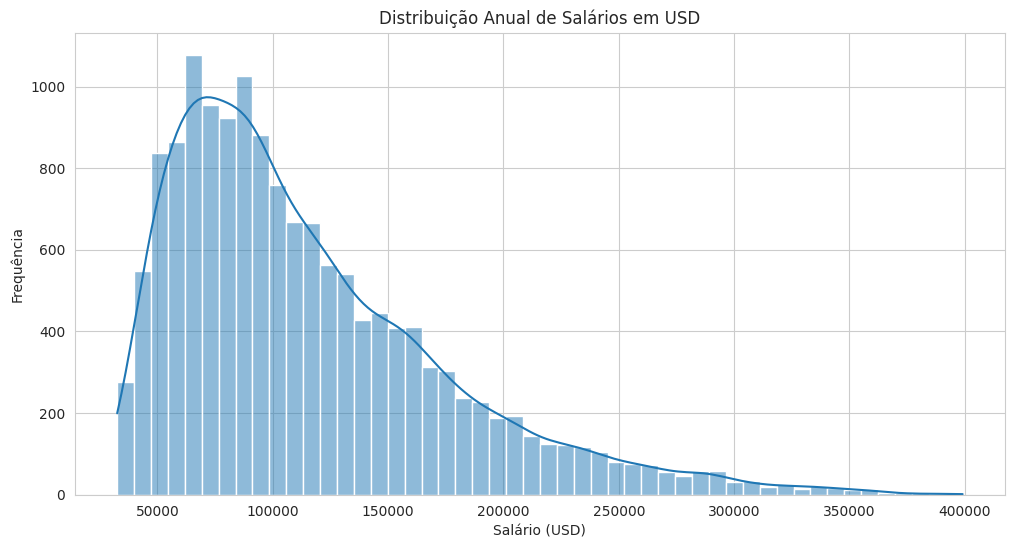


Estatísticas Descritivas do Salário (USD):
count     15,000
mean     115,349
std       60,261
min       32,519
25%       70,180
50%       99,705
75%      146,408
max      399,095
Name: salary_usd, dtype: object


In [5]:
# Distribuição de Salários
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='salary_usd', bins=50, kde=True)
plt.title('Distribuição Anual de Salários em USD')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.ticklabel_format(style='plain', axis='x') # Evita notação científica no eixo X
plt.show()

# Estatísticas descritivas
print("\nEstatísticas Descritivas do Salário (USD):")
print(df['salary_usd'].describe().apply(lambda x: f'{x:,.0f}'))



```
2.2. Salário por Nível de Experiência e Tamanho da Empresa
Vamos usar boxplots para visualizar a relação entre salários e variáveis categóricas cruciais.
```



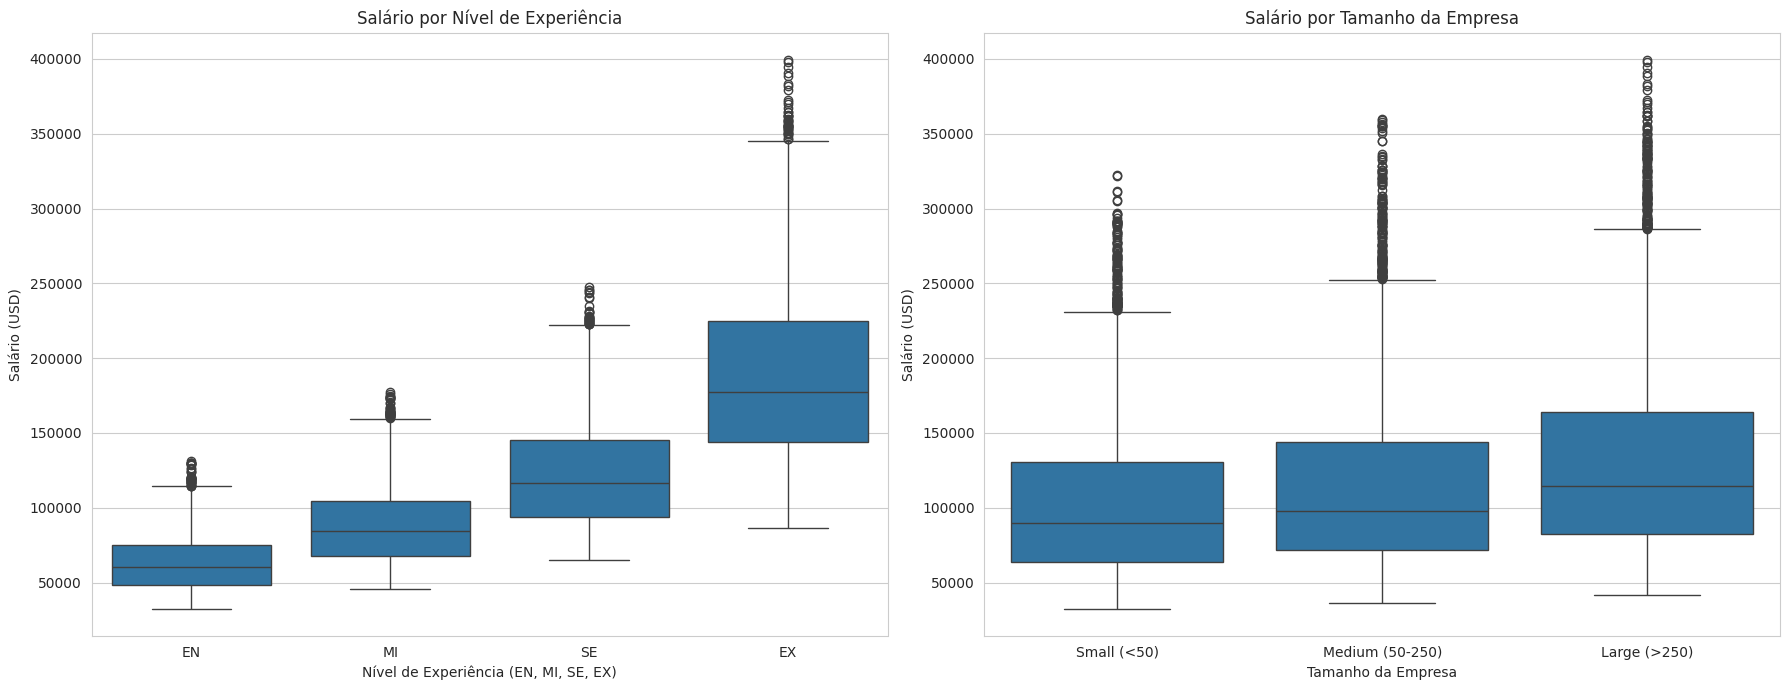

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1: Salário vs. Nível de Experiência
# Corrigindo o 'order_exp' para corresponder aos valores reais da coluna 'experience_level'
order_exp = ['EN', 'MI', 'SE', 'EX'] # Corrigido para os valores do dataset
sns.boxplot(x='experience_level', y='salary_usd', data=df, ax=axes[0], order=order_exp)
axes[0].set_title('Salário por Nível de Experiência')
axes[0].set_xlabel('Nível de Experiência (EN, MI, SE, EX)')
axes[0].set_ylabel('Salário (USD)')
axes[0].ticklabel_format(style='plain', axis='y')

# Gráfico 2: Salário vs. Tamanho da Empresa
sns.boxplot(x='company_size', y='salary_usd', data=df, ax=axes[1], order=['Small (<50)', 'Medium (50-250)', 'Large (>250)'])
axes[1].set_title('Salário por Tamanho da Empresa')
axes[1].set_xlabel('Tamanho da Empresa')
axes[1].set_ylabel('Salário (USD)')
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()



```
2.3. Análise da Demanda e Relevância de Habilidades
Esta é a análise que mais se conecta ao tema "Futuro do Trabalho". Precisamos processar a coluna required_skills.
```



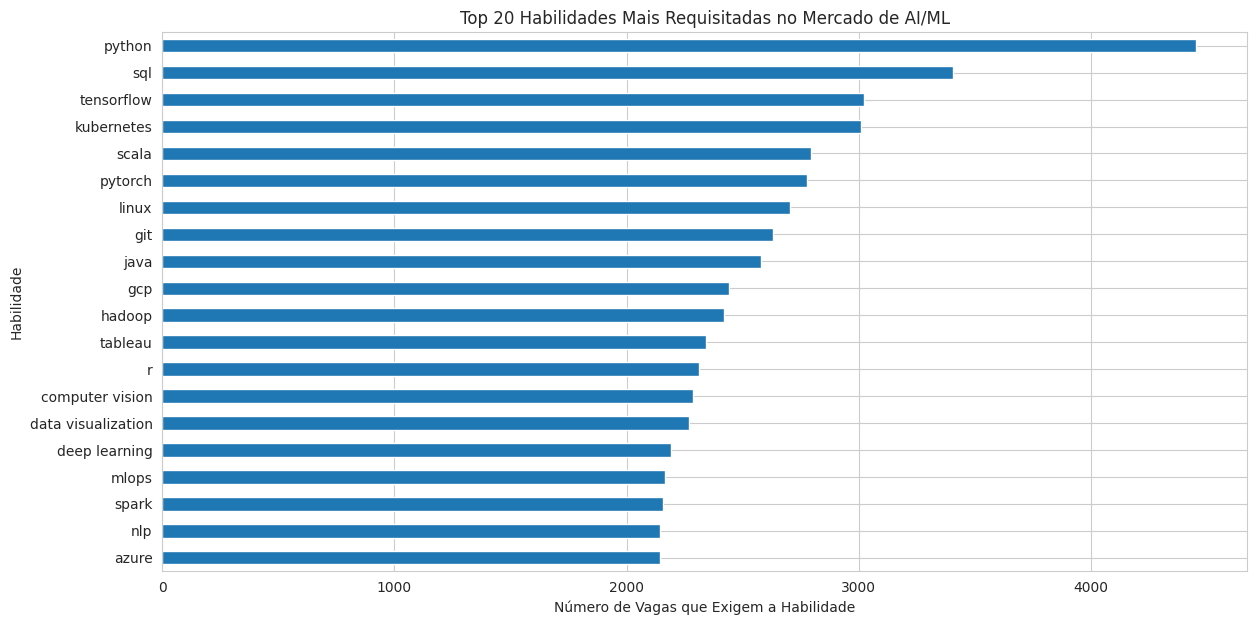


Salário Médio Associado às Top Habilidades (USD):
deep learning         117242.0
scala                 117207.0
git                   116660.0
nlp                   116218.0
computer vision       115898.0
gcp                   115800.0
hadoop                115750.0
pytorch               115527.0
data visualization    115464.0
r                     115452.0
java                  115336.0
azure                 115164.0
tensorflow            115143.0
kubernetes            115124.0
mlops                 115008.0
spark                 114765.0
linux                 114640.0
python                114399.0
sql                   113934.0
tableau               112897.0
dtype: float64


In [7]:
# Função para extrair todas as habilidades únicas
def extract_all_skills(df):
    all_skills = df['required_skills'].str.lower().str.split(r',\s*')
    # Flatten the list and count occurrences
    flat_list = [item for sublist in all_skills for item in sublist if item and item != 'none']
    return pd.Series(flat_list).value_counts()

skill_counts = extract_all_skills(df)

# Top 20 Habilidades Mais Requisitadas
top_n = 20
plt.figure(figsize=(14, 7))
skill_counts.head(top_n).sort_values(ascending=True).plot(kind='barh')
plt.title(f'Top {top_n} Habilidades Mais Requisitadas no Mercado de AI/ML')
plt.xlabel('Número de Vagas que Exigem a Habilidade')
plt.ylabel('Habilidade')
plt.show()

# Insight de Relevância: Salário Médio das Top Habilidades
top_skills_list = skill_counts.head(top_n).index.tolist()
skill_salaries = {}

for skill in top_skills_list:
    # Filtra as linhas onde a habilidade está presente (case insensitive)
    subset = df[df['required_skills'].str.lower().str.contains(skill, na=False)]
    skill_salaries[skill] = subset['salary_usd'].mean()

skill_salary_df = pd.Series(skill_salaries).sort_values(ascending=False).round(0)

print("\nSalário Médio Associado às Top Habilidades (USD):")
print(skill_salary_df)



```
2.4. Tendências de Trabalho Remoto
A proporção de trabalho remoto é uma variável chave na discussão sobre o futuro do trabalho.
```



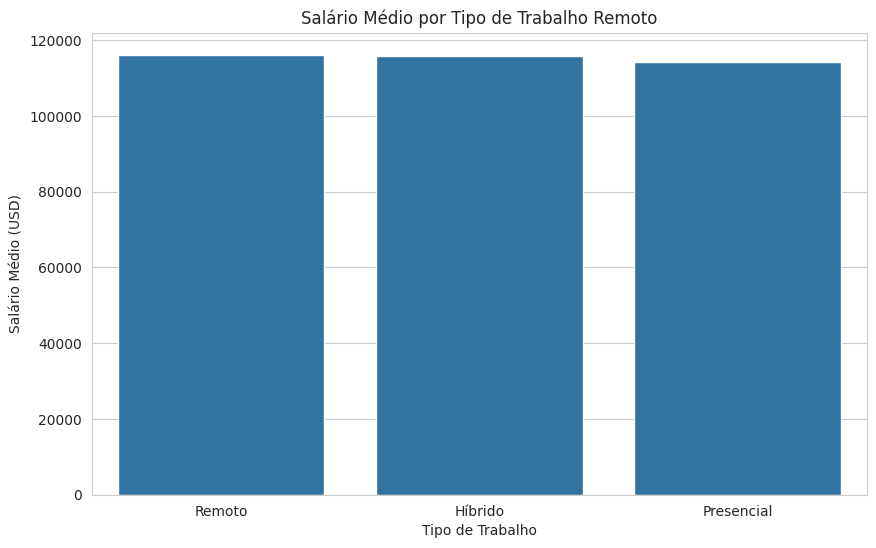


Salário Médio (USD) por Tipo de Trabalho Remoto:
remote_type
Remoto        116,161
Híbrido       115,777
Presencial    114,140
Name: salary_usd, dtype: object


In [8]:
# Conversão para proporção (Se 0, 50, 100 for a codificação)
remote_mapping = {0: 'Presencial', 50: 'Híbrido', 100: 'Remoto'}
df['remote_type'] = df['remote_ratio'].map(remote_mapping)

# Salário Médio por Tipo de Trabalho Remoto
remote_salary_mean = df.groupby('remote_type')['salary_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=remote_salary_mean.index, y=remote_salary_mean.values)
plt.title('Salário Médio por Tipo de Trabalho Remoto')
plt.xlabel('Tipo de Trabalho')
plt.ylabel('Salário Médio (USD)')
plt.show()

print("\nSalário Médio (USD) por Tipo de Trabalho Remoto:")
print(remote_salary_mean.apply(lambda x: f'{x:,.0f}'))



```
Conclusão da EDA:
Estes gráficos e análises fornecem a base de insights para a seção Motivação do Projeto no PDF e para a lógica do seu webapp Streamlit (e.g., as habilidades mais bem pagas, a diferença salarial por experiência e o impacto do trabalho remoto).
```



# 3. Modelagem (Machine Learning)
Nesta seção, prepararemos os dados para o algoritmo de Machine Learning, treinaremos o modelo de Regressão e avaliaremos seu desempenho.



```
3.1. Preparação Final dos Dados para Modelagem
Precisamos converter todas as variáveis categóricas (exceto as ordinais já mapeadas) em formato numérico usando One-Hot Encoding. Também precisamos criar variáveis para as habilidades.
```



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Definição da Variável Alvo e Features
TARGET = 'salary_usd'
FEATURES = ['experience_level_ordinal', 'years_experience', 'company_size', 'company_location',
            'remote_ratio', 'job_title', 'education_required']
# Adicionaremos as features de HABILIDADES mais adiante.

# 2. FEATURE ENGINEERING: Habilidades (Top N)
# Vamos focar nas top 50 habilidades para evitar a criação de features demais (Maldição da Dimensionalidade)
# Este é um passo crucial para o requisito de 'aproveitar as habilidades atuais'.
N_SKILLS = 50
top_skills = skill_counts.head(N_SKILLS).index.tolist()

# Criar uma nova coluna binária (dummy variable) para cada habilidade no top 50
for skill in top_skills:
    # Cria uma coluna que é 1 se a habilidade estiver na lista de required_skills (case insensitive)
    df[f'skill_{skill.replace(" ", "_")}'] = df['required_skills'].str.lower().apply(lambda x: 1 if skill in x else 0)
    FEATURES.append(f'skill_{skill.replace(" ", "_")}') # Adiciona a nova feature à lista

print(f"Número de features de habilidades criadas: {N_SKILLS}")


# 3. One-Hot Encoding para Variáveis Categóricas (Nominais)
# Variáveis que não são ordinais e não foram processadas (Job Title, Location, Education)
categorical_features = ['company_size', 'company_location', 'job_title', 'education_required']
df_model = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Atualizar a lista FEATURES para incluir as novas colunas dummy
FEATURES = [col for col in FEATURES if col not in categorical_features] # Remove as originais
# Adiciona as novas colunas dummy
FEATURES.extend([col for col in df_model.columns if any(cat_feat in col for cat_feat in categorical_features) and col not in FEATURES])

# 4. Seleção final de X e y
X = df_model[FEATURES].select_dtypes(include=['int64', 'float64', 'uint8']) # Seleciona apenas tipos numéricos (incluindo dummies)
y = df_model[TARGET]

# 5. Separação de Dados (Treino e Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape de Treino (X, y): {X_train.shape}, {y_train.shape}")
print(f"Shape de Teste (X, y): {X_test.shape}, {y_test.shape}")


# 6. Escalonamento de Variáveis Numéricas (Para algoritmos baseados em distância/gradiente)
# Aplicamos apenas nas colunas numéricas originais, não nas dummies.
numerical_cols = ['experience_level_ordinal', 'years_experience', 'remote_ratio']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Número de features de habilidades criadas: 50
Shape de Treino (X, y): (12000, 27), (12000,)
Shape de Teste (X, y): (3000, 27), (3000,)




```
3.2. Treinamento do Modelo de Machine Learning (Regressão)
Vamos escolher um modelo robusto, como o Random Forest Regressor, que lida bem com a alta dimensionalidade e dados mistos.
```



In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Instanciar e Treinar o Modelo
print("\nIniciando o treinamento do modelo RandomForestRegressor...")
model_rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)
print("Treinamento concluído.")

# 2. Predição no conjunto de Teste
y_pred = model_rf.predict(X_test)

# 3. Avaliação do Modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nResultados da Avaliação do Modelo:")
print(f"MAE (Erro Absoluto Médio): $ {mae:,.2f}")
print(f"R² Score (Coeficiente de Determinação): {r2:.4f}")


Iniciando o treinamento do modelo RandomForestRegressor...
Treinamento concluído.

Resultados da Avaliação do Modelo:
MAE (Erro Absoluto Médio): $ 28,586.90
R² Score (Coeficiente de Determinação): 0.5864




```
3.3. Importância das Features (Model Interpretation)
Vamos ver quais features o modelo considerou mais importantes.
```



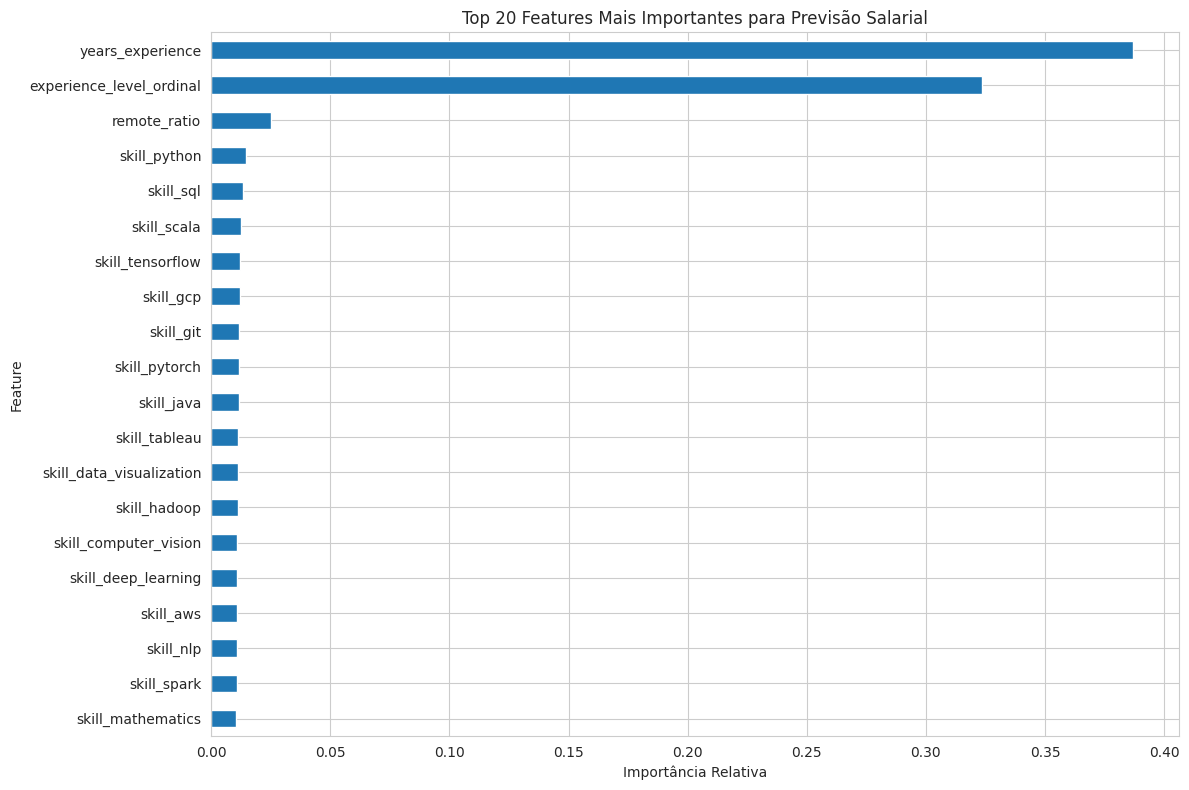


Importância das Features de Habilidades no Top 20:
skill_python                0.014569
skill_sql                   0.013344
skill_scala                 0.012629
skill_tensorflow            0.012258
skill_gcp                   0.012019
skill_git                   0.011671
skill_pytorch               0.011628
skill_java                  0.011505
skill_tableau               0.011479
skill_data_visualization    0.011253
skill_hadoop                0.011179
skill_computer_vision       0.010952
skill_deep_learning         0.010768
skill_aws                   0.010750
skill_nlp                   0.010717
skill_spark                 0.010650
skill_mathematics           0.010441
dtype: float64


In [11]:
# Mapeamento da importância das features
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
top_20_features = feature_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_20_features.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 20 Features Mais Importantes para Previsão Salarial')
plt.xlabel('Importância Relativa')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Análise das Habilidades Mais Relevantes
skill_features = [col for col in top_20_features.index if 'skill_' in col]
print("\nImportância das Features de Habilidades no Top 20:")
print(top_20_features[skill_features])



```
3.4. Salvamento do Modelo e Objetos de Pré-processamento
Para usar o modelo no Streamlit, precisamos salvá-lo junto com o Scaler e a lista de colunas (features).
```



In [12]:
import joblib

# Salvando o Modelo Treinado
joblib.dump(model_rf, 'model_rf_salary_predictor.pkl')
print("Modelo salvo como 'model_rf_salary_predictor.pkl'")

# Salvando o Scaler (necessário para pré-processar inputs do webapp)
joblib.dump(scaler, 'scaler.pkl')
print("Scaler salvo como 'scaler.pkl'")

# Salvando a lista de COLUNAS (features) que o modelo espera
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Lista de colunas do modelo salvo como 'model_columns.pkl'")

# Salvando a lista de TOP SKILLS (para o webapp criar os checkboxes corretos)
joblib.dump(top_skills, 'top_skills.pkl')
print("Lista de top skills salvo como 'top_skills.pkl'")

print("\nOs arquivos necessários para o Streamlit foram salvos com sucesso.")

Modelo salvo como 'model_rf_salary_predictor.pkl'
Scaler salvo como 'scaler.pkl'
Lista de colunas do modelo salvo como 'model_columns.pkl'
Lista de top skills salvo como 'top_skills.pkl'

Os arquivos necessários para o Streamlit foram salvos com sucesso.
